# Creating our own dataset

We are going to create a dataset with some directions of high variance and some directions of low variance. Also we will apply PCA on this dataset and see what is going to happen. First we are going to create a cloud vector of 10,000 two dimensional points, then it will be stretched by 2 and smashed by a factor of 0.5 into an ellipsoid and last rotate it by an angle of pi/3.

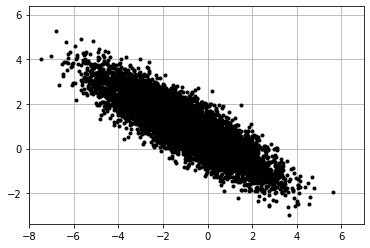

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x_center = np.array([-1, 1])      # Center of data (mean)
x_center = np.diag(x_center)
sig = np.array([0.5, 2])   # Principal axes
sig = np.diag(sig)

theta = np.pi/3            # Rotate by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000
# Rotate, Stretch and smash, Center data
X = np.matmul(np.matmul(R, sig), np.random.randn(2,nPoints)) + np.matmul(x_center, np.ones((2,nPoints))) # Create 10,000 points

plt.plot(X[0,:],X[1,:], '.', Color='k')
plt.grid()
plt.axis('equal')
plt.xlim((-8, 7))
plt.ylim((-4, 7))

plt.show()

We are going to compute the average of the data and subtract that center with all of the data, this process brings the data back to the origin. After that we are computing the SVD, that tells us the rotation, U matrix, and how stretched the data is, singular values S. We are going to figure out what the 1st, 2nd and so on standard confidence interval is, based on the information from the SVD. When we take the SVD of the matrix of data we find a S (sigma) that has two elements that tell us that the first principal direction has a lot of variance and the second has a small variance. The U matrix tells us how this distribution is rotated at what angle are those principal components. 

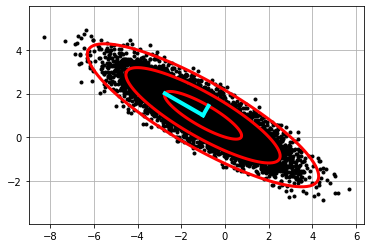

In [3]:
Xavg = np.mean(X,axis=1)                  # Compute mean (average, center of data)
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints)) # Rotation U, Stretch S
S = np.diag(S)

plt.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
plt.grid()
plt.xlim((-8, 7))
plt.ylim((-4, 7))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = np.matmul(np.matmul(U, S), np.array([np.cos(theta),np.sin(theta)])) # U * S * unit circle and it maps into the distribution

plt.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',LineWidth=3)
plt.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',LineWidth=3)
plt.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0,0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0,0]]),'-',color='cyan',LineWidth=4)
plt.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1,1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1,1]]),'-',color='cyan',LineWidth=4)
plt.axis('equal')
plt.show()

# Ovarian cancer dataset
To download run the following commands:
  - !wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
  - !wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv

(216 x 4000) 216 patients, 4000 markers measured for every patient.
Broken in groups, first 108 have cancer, last 108 dont have cancer. 4000 points are far too many to plot and understand, so PCA is going to learn some eigen genetic sequences. When we SVD this (216 x 4000) matrix we get a (216, 216) matrix, diagonal S and VT matrix. The first row of VT is a gene sequence that captures the most variation between every patient, the second captures the second most and so on. Now instead of visualizing all 4000 gene sequences we can plot the first few sequences, lower dimension.

--2020-06-23 15:47:12--  https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.1, 2620:100:6031:1::a27d:5101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/bal044f83ezxiia/ovariancancer_obs.csv [following]
--2020-06-23 15:47:13--  https://www.dropbox.com/s/raw/bal044f83ezxiia/ovariancancer_obs.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf74c0d9870eba6cb2cfb0d45de.dl.dropboxusercontent.com/cd/0/inline/A6OHGB-3orMNn5Z8EVP2vHloUihwV3dizkZ-UDPHS-__KQEVvVCmol2gZ_NdlB-uBO4IfsGSmgsLvgOX_0qdK6ZzhHa5NWEvLzvqC2_nDcmzGK7hVoi2D7v2DUy1QBMmo2M/file# [following]
--2020-06-23 15:47:13--  https://ucf74c0d9870eba6cb2cfb0d45de.dl.dropboxusercontent.com/cd/0/inline/A6OHGB-3orMNn5Z8EVP2vHloUihwV3dizkZ-UDPHS-__KQEVvVCmol2gZ_NdlB-uBO4IfsGSmgsLvgOX_0qd

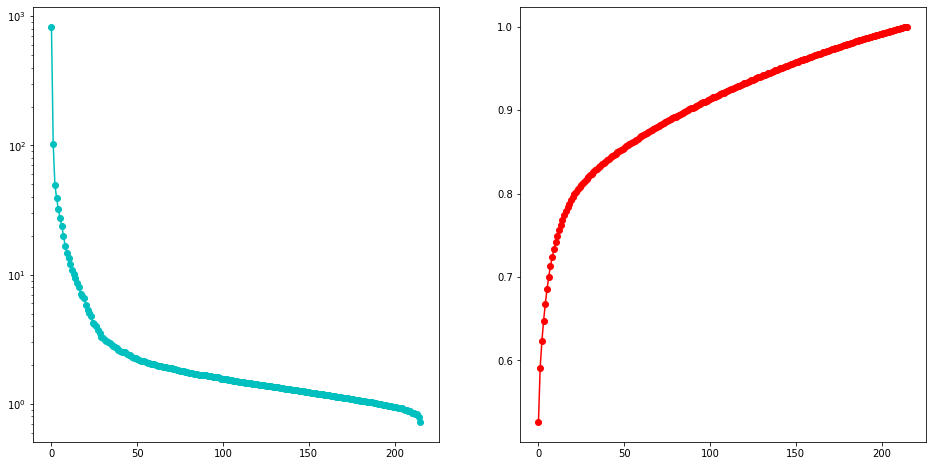

In [ ]:
!wget https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv
!wget https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# Load dataset
features = np.loadtxt('/content/ovariancancer_obs.csv', delimiter=',')

# Load labels (Cancer, Normal)
f = open('/content/ovariancancer_grp.csv', "r")
labels = f.read().split("\n")

# Compute Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(features, full_matrices=0)

fig1 = plt.figure(figsize=(16, 8))
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='c') # We can see that 
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='r')

plt.show()

We can see from the first plot that a huge part of the variance comes from the first 3 singular values, and as it goes down we have a hufe roll-off where there is little information. By keeping the first 10 singular values we can capture a lot of variance between all of the patients. The right plot is the cumulative sum, showing how much variance is captured by the first R singular vectors.

In [ ]:
fig2 = plt.figure(figsize=(16, 8))
ax = fig2.add_subplot(111, projection='3d')

# We take our first features (observation) matrix and project it
# in to the first 3 principal components.
# Take every patients genetic sequence and dot product it with
# the first three VT rows and get three numbers as the output
# We plot these 3 numbers
for j in range(features.shape[0]):
  x = np.matmul(VT[0, :], features[j, :].T)
  y = np.matmul(VT[1, :], features[j, :].T)
  z = np.matmul(VT[2, :], features[j, :].T)

  if labels[j] == 'Cancer':
    ax.scatter(x, y, z, marker='x', color='r', s=50)
  else:
    ax.scatter(x, y, z, marker='o', color='b', s=50)

ax.view_init(25, 20)
plt.show()

The X's represent patients with cancer and O's represent patients without. We can see that with the first 3 principal components, the data is pretty much seperated. If we would take the first 5-10 components it would be even better spread out. This way we got a low dimensional, human interpretable way of understanding this information.

# PCA on olivetti faces dataset

We can use a python function for PCA, from the sklearn library. We are going to set the n_components argument to 150, This is the number of features.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

images = fetch_olivetti_faces()

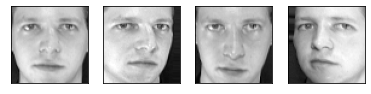

In [ ]:
fig = plt.figure(figsize=(8, 6))
for i in range(4):
  ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
  ax.imshow(images.images[i], cmap=plt.cm.gray)

data = images.data

In [ ]:
# Scratch
U0, S0, VT0 = np.linalg.svd(data, full_matrices=0)

# Built-in function
from sklearn.decomposition import PCA
pca = PCA(n_components=150, whiten=True)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

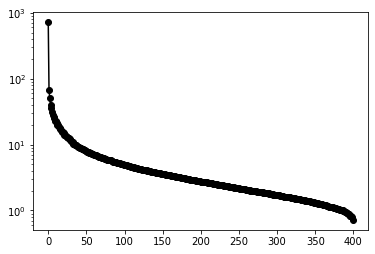

In [ ]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.semilogy(S0,'-o',color='k')

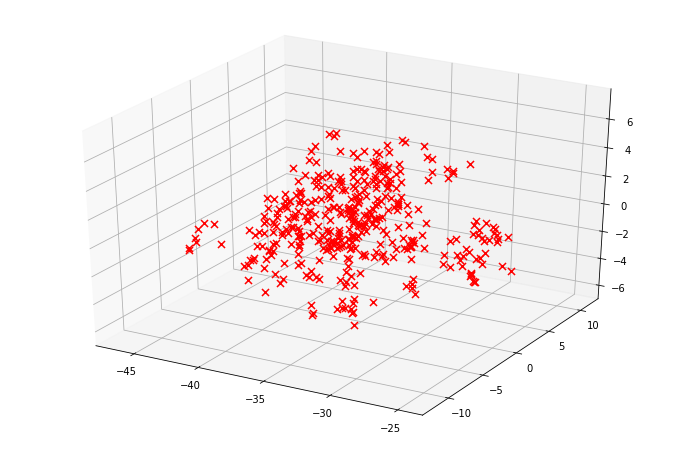

In [ ]:
fig4 = plt.figure(figsize=(12, 8))
ax4 = fig4.add_subplot(111, projection='3d')

for i in range(len(data)):
  x = np.matmul(VT0[0, :], data[i])
  y = np.matmul(VT0[1, :], data[i])
  z = np.matmul(VT0[2, :], data[i])

  ax4.scatter(x, y, z, marker='x', c='r', s=50)

plt.show()

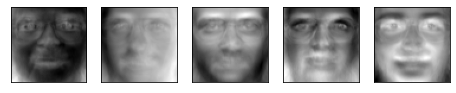

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(5):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(images.images[0].shape),
              cmap=plt.cm.gray)

In [50]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 8]

X, y = make_circles(n_samples=100)

y_color = np.zeros(100)
for i in range(1, 11):
  y_color[np.random.randint(100)] = i

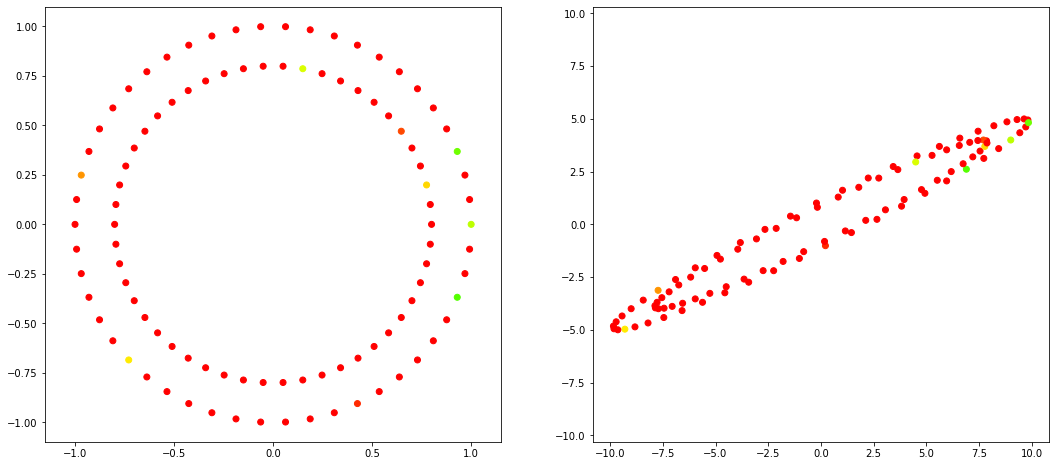

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('equal')
ax1.scatter(X[:, 0], X[:, 1], cmap='prism', c=y_color)

R = [[9, 4], [4, 3]]
new_X = np.matmul(X, R)

ax2 = fig.add_subplot(1, 2, 2)
ax2.axis('equal')
ax2.scatter(new_X[:, 0], new_X[:, 1], cmap='prism', c=y_color)

In [31]:
U, S, VT = np.linalg.svd( R )
S = np.diag(S)

In [43]:
U1 = np.zeros((100,2))
S1 = np.zeros((100,2))
VT1 = np.zeros((100,2))
for i in range(100):
    temp = X[i,:]
    temp = temp.reshape(2,1)
    rec_v = VT @  temp
    rec_s =  S @ rec_v
    rec_u = U @ rec_s
    U1[i,:] = rec_u.reshape(-1)
    S1[i,:] = rec_s.reshape(-1)
    VT1[i,:] = rec_v.reshape(-1)

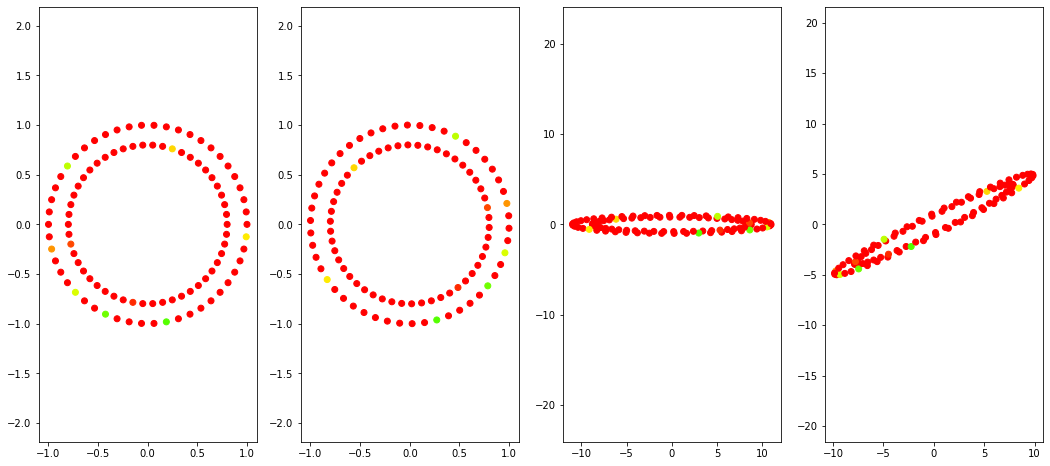

In [44]:
fig2 = plt.figure()

ax = fig2.add_subplot(141)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], cmap='prism', c=y_color)

ax1 = fig2.add_subplot(142)
ax1.axis('equal')
ax1.scatter(VT1[:, 0], VT1[:, 1], cmap='prism', c=y_color)

ax2 = fig2.add_subplot(143)
ax2.axis('equal')
ax2.scatter(S1[:, 0], S1[:, 1], cmap='prism', c=y_color)

ax3 = fig2.add_subplot(144)
ax3.axis('equal')
ax3.scatter(U1[:, 0], U1[:, 1], cmap='prism', c=y_color)

(-12.090795711819903, 12.0907957118199, -5.499366107814932, 5.499366107814932)

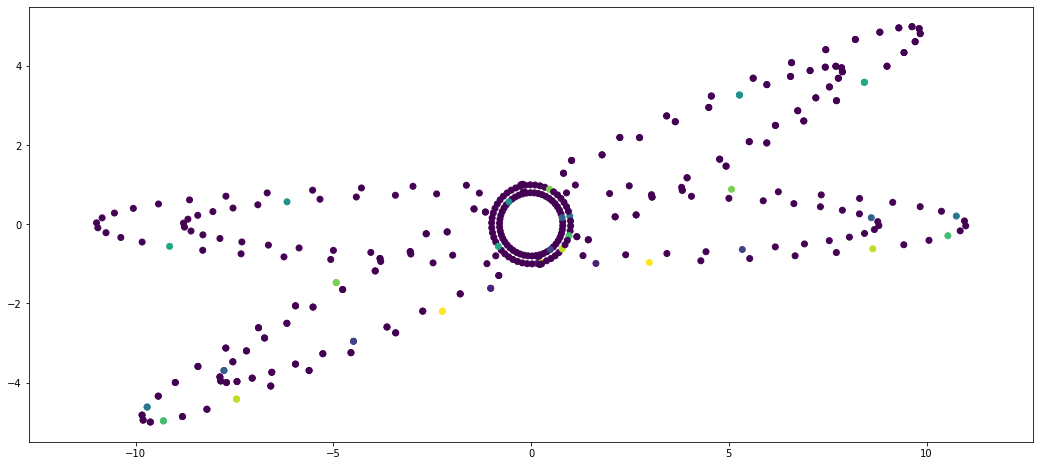

In [45]:
plt.scatter(new_X[:,0], new_X[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(VT1[:,0], VT1[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(S1[:,0], S1[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(U1[:,0], U1[:,1] , c= y_color)
plt.axis('equal')

(-12.090795711819903, 12.0907957118199, -5.499366107814932, 5.499366107814932)

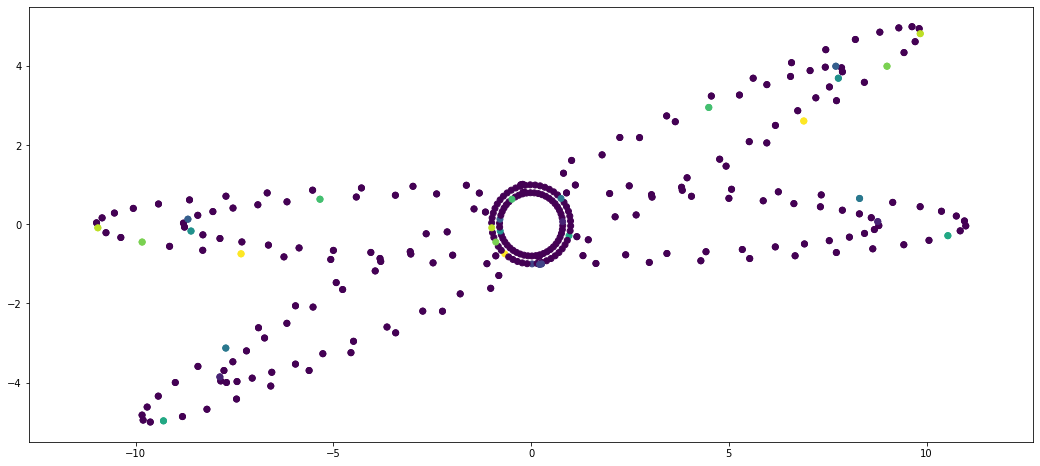

In [52]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_X)

plt.scatter(X_pca[:,0], X_pca[:,1] , c= y_color)
plt.axis('equal')

U1_pca, S1_pca, V1_pca = np.linalg.svd(R)
S1_pca = np.diag(S1_pca)

U1 = np.zeros((100,2))
S1 = np.zeros((100,2))
VT1 = np.zeros((100,2))
for i in range(100):
    temp = X[i,:]
    temp = temp.reshape(2,1)
    rec_v = V1_pca @  temp
    rec_s =  S1_pca @ rec_v
    rec_u = U1_pca @ rec_s
    U1[i,:] = rec_u.reshape(-1)
    S1[i,:] = rec_s.reshape(-1)
    VT1[i,:] = rec_v.reshape(-1)


plt.scatter(new_X[:,0], new_X[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(VT1[:,0], VT1[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(S1[:,0], S1[:,1] , c= y_color)
plt.axis('equal')
plt.scatter(U1[:,0], U1[:,1] , c= y_color)
plt.axis('equal')

In [ ]:
|